# Лабораторная №3. Снижение размерности признакового пространства методом главных компонент.

## 1. Обработка данных
Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss



%matplotlib inline # авто вывод графиков (отпадает необходимость писать plt.show())

UsageError: unrecognized arguments: # авто вывод графиков (отпадает необходимость писать plt.show())


 Указываем названия выбранных признаков

In [3]:
features =["Население","ОК(кроме 6001) Возм. не представлено (объем)",
           "ОК(кроме 6001) Возм. не представлено (кол-во)","Расходные операции 6001(кол-во)",
           "Приходные операции 6001(кол-во)","Расходные операции 6001","Доли выв. ДС в заруб. банки",
           "Кол-во риск-ориентировок запросы","Кол-во проверок","КВО 4005 Всего (объем)",
           "КВО 4005 Всего (кол-во)", "ВК (6001) Всего (объем)","ВК (6001) Всего (кол-во)",
           "Приходные операции 6001","05 Доли сомнительных операций", "Общий объем опер.90дн.",
           "Общее кол-во опер.90дн.", "ВК (6001) Всего (объем)90дн.", "Общий объем опер.30дн.",
           "ВК (6001) Всего (кол-во)90дн.", "Общее кол-во опер.30дн.", "09 Доли возм. не представленных сообщений",
           "08 Доли кол-во КВО 5007 возм. не предст. сообщений", "КВО 5007 Всего (кол-во)",
           "КВО 5007 Всего (объем)", "КВО 5007 Возм. не представлено (объем)", 
           "07 Доли объема возм. не предст. сообщений по ВК", "КВО 5007 Возм. не представлено (кол-во)",
           "06 Доли объема возм. не предст. сообщений по ОК", "03 Доли выв. ДС в заруб. банки(без оффш.)",
           "04 Доли выв. ДС в оффшор. банки", "02 Доли опер. обналич", "01 Доли опер. с фиктивными",
           "КВО 4007 Всего (кол-во)", "КВО 4007 Всего (объем)", "КВО 4007 Возм. не представлено (объем)",
           "КВО 4007 Возм. не представлено (кол-во)", "ВК(6001) Возм. не представлено (объем)", 
           "ВК(6001) Возм. не представлено (кол-во)", "Сообщения объем 4077 (3041)","Сообщения кол-во 4077 (3041)",
           "Приход/расход 6001", "Приход/расход", "Снятие наличных денежных средств", "Сомнительные операции",
           "Перечисления со счетов оффшорных банков", "Перечисления со счетов зарубежных банков",
           "Перечисления на счета в оффшорных банках", "Перечисления на счета в зарубежных банках(без оффш.)",
           "Перечисления на счета в зарубежных банках", 
           "Операции с организациями, имеющими признаки фиктивности(кол-во)",
           "Операции с организациями, имеющими признаки фиктивности","Общий объем операций 6001",
           "ВК(6001) Всего (кол-во)", "ВК(6001) Всего (объем)", "Общий объем операций (руб.)",
           "Общее кол-во операций 6001", "Общее кол-во операций", 
           "Обороты за отчетный период по кредиту «итого», тыс.руб.;счета Депо – в штуках",
           "Сотня по активам", "Общий объем операций с бюдж. орг.", 
           "Обороты за отчетный период по дебету «итого», тыс.руб.;счета Депо – в штуках", "Кол-во юр. лиц",
           "Кол-во фиктивности  юр. лиц", "Кол-во физ. лиц", "Кол-во получ. бюджетных средств",
           "Кол-во не опоз. юл/фл", "Кол-во клиентов-нерезидентов", "Доли фиктивности  юр. лиц", 
           "Кол-во клиентов есть счет", "Кол-во клиентов", "Доли клиентов физ. лиц", "Доли клиентов юр. лиц",
           "Доли  клиентов-нерезидентов"]
#в переменную f_len записываем кол-во признаков x1 , x2 , x3 , x4 , x5
f_len = len(features) 

Считываем данные

In [4]:
data = pd.read_excel('data.xlsx').loc[:,features]
data.head()

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Кол-во физ. лиц,Кол-во получ. бюджетных средств,Кол-во не опоз. юл/фл,Кол-во клиентов-нерезидентов,Доли фиктивности юр. лиц,Кол-во клиентов есть счет,Кол-во клиентов,Доли клиентов физ. лиц,Доли клиентов юр. лиц,Доли клиентов-нерезидентов
КО1,12263861,280074328480,18766,11492,21298,20183270043,6.863105,1,0,52373287768,...,7170,25,56,396,7.448889,18304,19261,39.171766,61.461976,2.163462
КО2,5208690,157537353,205,223,114,169231559,0.000000,0,0,1623086106,...,26,0,0,1,7.171315,277,304,9.386282,90.613718,0.361011
КО3,12263861,0,0,0,0,0,0.000000,0,0,0,...,0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
КО4,12263861,8123066430,994,487,360,529987788,0.222585,0,0,879015244,...,84,12,3,5,8.755130,812,854,10.344828,90.024631,0.615764
КО5,12263861,0,0,0,0,0,0.000000,0,0,0,...,9,0,0,0,0.000000,24,24,37.500000,62.500000,0.000000


Поскольку исходные признаки отличаются масштабом измерения, то будем рассматривать вектор центрировано-нормированных признаков x* = (x1*, x2*,…, xk*)T и на основе исходной матрицы данных X рассчитаем оценку корреляционной матрицы 𝑅̂𝑥. 

Объекты, для которых значения хотя бы одного признака отсутствуют, исключены из рассмотрения. 

Также, для последующей работы, создадим dataframe на основании полученных данных

In [6]:
data_cleared = data[data!='-'].dropna().astype('float64') # для которых нет значений, удаляем, потом центрируем и нормируем
index = data_cleared.index #записываем в переменную index названия строк исходной матрицы
columns = data_cleared.columns #записываем в переменную columns названия столбцов исходной матрицы

scaled = (data_cleared - data_cleared.mean(axis=0))/data_cleared.std() #стандартизируем данные: вычитаем среднее и делим на стандартное отклонение

#создаем датафрейм из scaled со столбцами columns и индексами index
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 

scaled_data.head()

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Кол-во физ. лиц,Кол-во получ. бюджетных средств,Кол-во не опоз. юл/фл,Кол-во клиентов-нерезидентов,Доли фиктивности юр. лиц,Кол-во клиентов есть счет,Кол-во клиентов,Доли клиентов физ. лиц,Доли клиентов юр. лиц,Доли клиентов-нерезидентов
КО1,0.845613,1.781647,1.528110,0.500958,0.856121,0.593970,0.790018,1.637973,-0.368015,2.317038,...,0.888669,0.054832,0.928638,3.279081,0.077229,0.749397,0.622184,1.116752,0.171202,0.180016
КО2,-0.625334,-0.088791,-0.080000,-0.083874,-0.074451,-0.096427,-0.178912,-0.359026,-0.368015,-0.019596,...,-0.065205,-0.072064,-0.082088,-0.106157,0.051362,-0.068774,-0.066630,-0.228618,0.867231,-0.117217
КО3,0.845613,-0.089843,-0.097761,-0.095447,-0.079459,-0.102265,-0.178912,-0.359026,-0.368015,-0.094326,...,-0.068676,-0.072064,-0.082088,-0.114727,-0.616908,-0.081346,-0.077676,-0.652584,-1.296268,-0.176750
КО4,0.845613,-0.035564,-0.011642,-0.070173,-0.063645,-0.083983,-0.147488,-0.359026,-0.368015,-0.053855,...,-0.057460,-0.011154,-0.027942,-0.071876,0.198953,-0.044493,-0.046646,-0.185322,0.853166,-0.075207
КО5,0.845613,-0.089843,-0.097761,-0.095447,-0.079459,-0.102265,-0.178912,-0.359026,-0.368015,-0.094326,...,-0.067474,-0.072064,-0.082088,-0.114727,-0.616908,-0.080257,-0.076804,1.041241,0.195986,-0.176750


Выведем оставшиеся в выборке объекты:

In [7]:
print('Было {} объектов,стало {}'.format(data.shape[0],scaled_data.shape[0]))

Было 1474 объектов,стало 1474


### 2. Корреляционная матрица


Для расчета коэффициентов корреляции между каждой парой признаков воспользуемся стандартным методом .corr

In [8]:
correlation = scaled_data.corr() #корреляционная матрица
correlation

,Население,ОК(кроме 6001) Возм. не представлено (объем),ОК(кроме 6001) Возм. не представлено (кол-во),Расходные операции 6001(кол-во),Приходные операции 6001(кол-во),Расходные операции 6001,Доли выв. ДС в заруб. банки,Кол-во риск-ориентировок запросы,Кол-во проверок,КВО 4005 Всего (объем),...,Кол-во физ. лиц,Кол-во получ. бюджетных средств,Кол-во не опоз. юл/фл,Кол-во клиентов-нерезидентов,Доли фиктивности юр. лиц,Кол-во клиентов есть счет,Кол-во клиентов,Доли клиентов физ. лиц,Доли клиентов юр. лиц,Доли клиентов-нерезидентов
Население,1.000000,0.062347,0.050586,0.043711,0.044364,0.053870,0.018939,-0.036770,-0.055505,0.050516,...,0.040392,0.027054,0.042863,0.064572,0.112622,0.041158,0.039086,-0.141051,-0.078735,0.064845
ОК(кроме 6001) Возм. не представлено (объем),0.062347,1.000000,0.914822,0.801235,0.823790,0.789724,0.024100,-0.003987,0.431911,0.904201,...,0.830732,0.882034,0.858360,0.837643,0.000279,0.856940,0.852821,0.031619,0.051719,0.009097
ОК(кроме 6001) Возм. не представлено (кол-во),0.050586,0.914822,1.000000,0.925123,0.941324,0.835457,0.005387,-0.004048,0.474186,0.983351,...,0.960512,0.957083,0.956707,0.922976,0.017098,0.980071,0.975281,0.048278,0.049171,-0.004043
Расходные операции 6001(кол-во),0.043711,0.801235,0.925123,1.000000,0.989391,0.849988,0.002486,0.006813,0.425561,0.921151,...,0.944576,0.884915,0.949794,0.917173,0.040604,0.945899,0.940330,0.060323,0.041623,-0.004408
Приходные операции 6001(кол-во),0.044364,0.823790,0.941324,0.989391,1.000000,0.854567,0.001433,0.002463,0.439370,0.942340,...,0.973503,0.918824,0.972705,0.928938,0.026989,0.969493,0.966645,0.059943,0.029614,-0.002962
Расходные операции 6001,0.053870,0.789724,0.835457,0.849988,0.854567,1.000000,0.086649,0.005176,0.391303,0.884156,...,0.836872,0.812255,0.844215,0.808721,0.040561,0.844137,0.840797,0.035795,0.059598,-0.000086
Доли выв. ДС в заруб. банки,0.018939,0.024100,0.005387,0.002486,0.001433,0.086649,1.000000,0.025784,0.003164,0.022195,...,0.000814,0.002642,0.005027,0.020712,0.112452,0.002217,0.002246,-0.005526,0.137348,0.264476
Кол-во риск-ориентировок запросы,-0.036770,-0.003987,-0.004048,0.006813,0.002463,0.005176,0.025784,1.000000,0.119440,0.001517,...,-0.006313,-0.011205,-0.003848,0.012857,0.234238,-0.006209,-0.005738,0.039199,0.253084,0.011512
Кол-во проверок,-0.055505,0.431911,0.474186,0.425561,0.439370,0.391303,0.003164,0.119440,1.000000,0.467484,...,0.468082,0.479397,0.467521,0.469344,0.143400,0.473698,0.469392,0.128605,0.210196,0.019296
КВО 4005 Всего (объем),0.050516,0.904201,0.983351,0.921151,0.942340,0.884156,0.022195,0.001517,0.467484,1.000000,...,0.964879,0.943190,0.959965,0.931414,0.018003,0.974567,0.970492,0.048105,0.046771,-0.001242


 Выведем корреляционную матрицу в более наглядном виде:

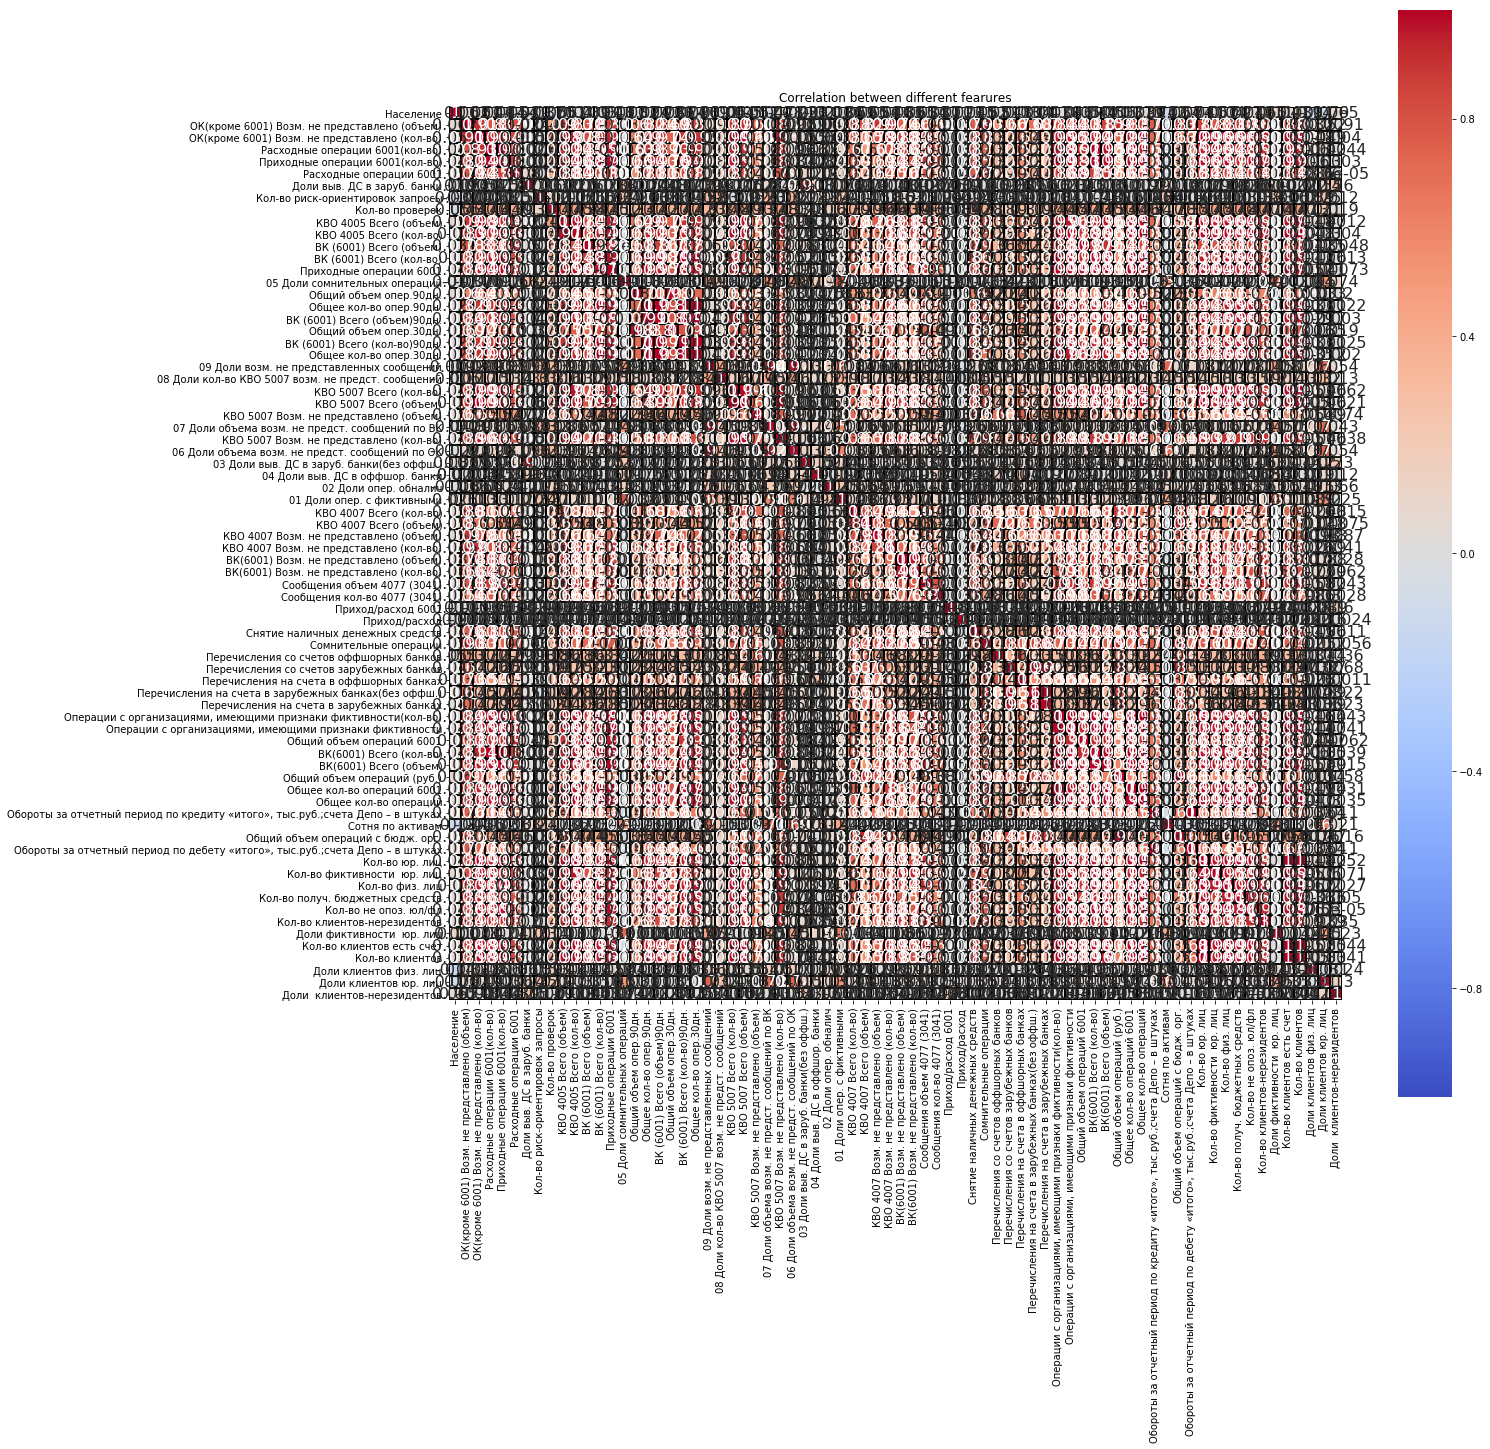

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1,vmin=-1, center=0, square=True,annot=True,cmap='coolwarm',annot_kws={"size": 16}, 
            linewidths=1, linecolor='black')
plt.title('Correlation between different fearures')
plt.show()

###  Проверка гипотезы о незначимости корреляционной матрицы

Далее согласно алгоритму, предполагая, что выборка извлечена из нормально распределенной генеральной совокупности, на уровне значимости α = 0,05 проверим гипотезу о незначимости корреляционной матрицы. 
$$H0: Rx = Е;$$
$$H1: Rx ≠ E $$

Для проверки гипотезы потребуются оценки собственных чисел корреляционной матрицы. Для воспользуемся встроенным методом np.linalg.eig

In [10]:
#проверим гипотезу о незначимости корреляционной матрицы
eigenvalues,eigenvectors=np.linalg.eig(correlation)#находим оценки собственных чисел и собственные векотры корреляционной матрицы
couple_lst=[]
for i in range(len(eigenvalues)): # список по убыванию сз с соответствующими св
    couple_lst.append((eigenvalues[i],eigenvectors[:,i]))
    
from operator import itemgetter
couple_lst = sorted(couple_lst, key = itemgetter(0),reverse=True)
#значениями оценок собственных чисел (eigenvalues), расположенных по убыванию
eigenvalues_sorted=sorted(eigenvalues,reverse=True)

 Для проверки гипотезы о незначимости матрицы   используется  критерий Уилкса.
Наблюдаемое значение:
$$ \chi^2 = -(n - \frac {2k+5}{6})ln|R_x| $$

где |𝑅̂𝑥| - определитель матрицы 𝑅̂𝑥, равный произведению оценок собственных чисел матрицы;

k – число факторов;

n – объем выборки. 

Критические значения χкр1 и 2 χкр2 определяются из уравнений: 

$$ P(\chi^2<\chi^2_{кр1}) = \frac {\alpha}{2} $$
$$ P(\chi^2>\chi^2_{кр2}) = \frac {\alpha}{2}  $$

In [11]:
import math
from scipy.stats import chi2
def chi_2(n,k,R):
    return -(n-1/6*(2*k+5))*math.log(abs(np.linalg.det(R)), math.e)
chi_2_crt=chi_2(data_cleared.shape[0],data_cleared.shape[1],correlation)
print('Наблюдаемое значение составило',chi_2_crt)
p_value=chi2.sf(chi_2_crt, data_cleared.shape[1]*(data_cleared.shape[1]-1)/2)
if p_value>0.05:
    print('Принимаем гипотезу, матрица парных коэффициентов корреляции незначима')
else:
    print('Отвергаем гипотезу, матрица парных коэффициентов корреляции значима')

Наблюдаемое значение составило 463958.7172376624
Отвергаем гипотезу, матрица парных коэффициентов корреляции значима


## 3. Доверительные интервалы


С вероятностью γ = 0,95 построим доверительные интервалы для собственных чисел.
Доверительный интервал для i-ого собственного числа λi при большом объеме выборки имеет вид:

$$ \frac {\hat \lambda_i}{1 +  u_{\frac {1+\gamma} {2}} \sqrt {\frac {2}{n-1}} } < \lambda_i < \frac {\hat \lambda_i}{1 -  u_{\frac {1+\gamma} {2}} \sqrt {\frac {2}{n-1}} } $$ 

где $ u_{\frac {1+\gamma} {2}} $ – квантиль уровня $ \frac {1+\gamma}{2} $ стандартного нормального распределения
<br>
n – объем выборки.

Для нахождения квантилей нормального распределения используем метод ss.norm.ppf (scipy.stats.norm.ppf)

In [12]:
def eigenval_left(l,n):
    return l/(1+ss.norm.ppf(0.975)*math.sqrt(2/(n-1))) #находим нижнюю границу интервала

def eigenval_right(l,n):
    return l/(1-ss.norm.ppf(0.975)*math.sqrt(2/(n-1))) #находим верхнюю границу интервала

conf_interval=np.empty((5, 3)) # создание матрицы для каждого из значений интервала и соответствующего ему собственного числа
for i in range(conf_interval.shape[0]):
    conf_interval[i,0]=eigenval_left(eigenvalues_sorted[i],data_cleared.shape[0])
    conf_interval[i,1]=eigenvalues_sorted[i]
    conf_interval[i,2]=eigenval_right(eigenvalues_sorted[i],data_cleared.shape[0])
    
conf_interval_df=pd.DataFrame(
    conf_interval,
    columns=['Нижняя граница','Собственное значение','Верхняя граница'])
conf_interval_df

,Нижняя граница,Собственное значение,Верхняя граница
0,38.141817,40.896446,44.079930
1,5.597919,6.002204,6.469431
2,5.176941,5.550823,5.982913
3,1.944801,2.085256,2.247578
4,1.566077,1.679180,1.809892


Оценим уровень информативности первых двух главных компонент составляет:

$$I_m(z(x^*)) = \frac {\lambda_1+\lambda_2+...+\lambda_m}{k} $$

In [43]:
pc=4 # кол-во главных компонент
lmbd=0
for i in range(pc):
    lmbd=lmbd+eigenvalues_sorted[i]

I = lmbd*100/f_len

print ('I(z) = {:.3f}%'.format(I))

I(z) = 73.696%


## 3.Критерии о достаточности главных компонент

### Критерия Кайзера

 Количество главных компонент можно посчитать с помощью Критерия Кайзера (отбираются факторы с собственными числами > 1)

In [44]:
if len(eigenvalues[eigenvalues > 1])>=2:
    print('Гипотеза о достаточности двух главных компонент принимается')
else:
    print('Гипотеза о достаточности двух главных компонент не принимается')
    

Гипотеза о достаточности двух главных компонент принимается


In [45]:
len(eigenvalues[eigenvalues > 1])

11

### Критерий каменистой осыпи

Для той же цели можно использовать критерий каменистой осыпи

In [46]:
#матрица дисперсий, чтоб на графике отметить
dispersion=np.empty(len(eigenvalues))
for i in range(dispersion.shape[0]):
    dispersion[i]=eigenvalues_sorted[i]/eigenvalues.sum()

In [47]:
sum_lmbd=eigenvalues.sum()
dft = pd.DataFrame([])
dft['y'] = eigenvalues_sorted #собственные значения в порядке убывания
dft['x'] = list(range(1,75))
dft['Tot_var'] = (dft['y']/sum_lmbd).apply(lambda x: round(x * 100, 2)).apply(str) + '%' #относительный вклад каждой 
#главной компоненты в суммарную дисперсию
dft.head()

,y,x,Tot_var
0,40.896446,1,55.27%
1,6.002204,2,8.11%
2,5.550823,3,7.5%
3,2.085256,4,2.82%
4,1.679180,5,2.27%


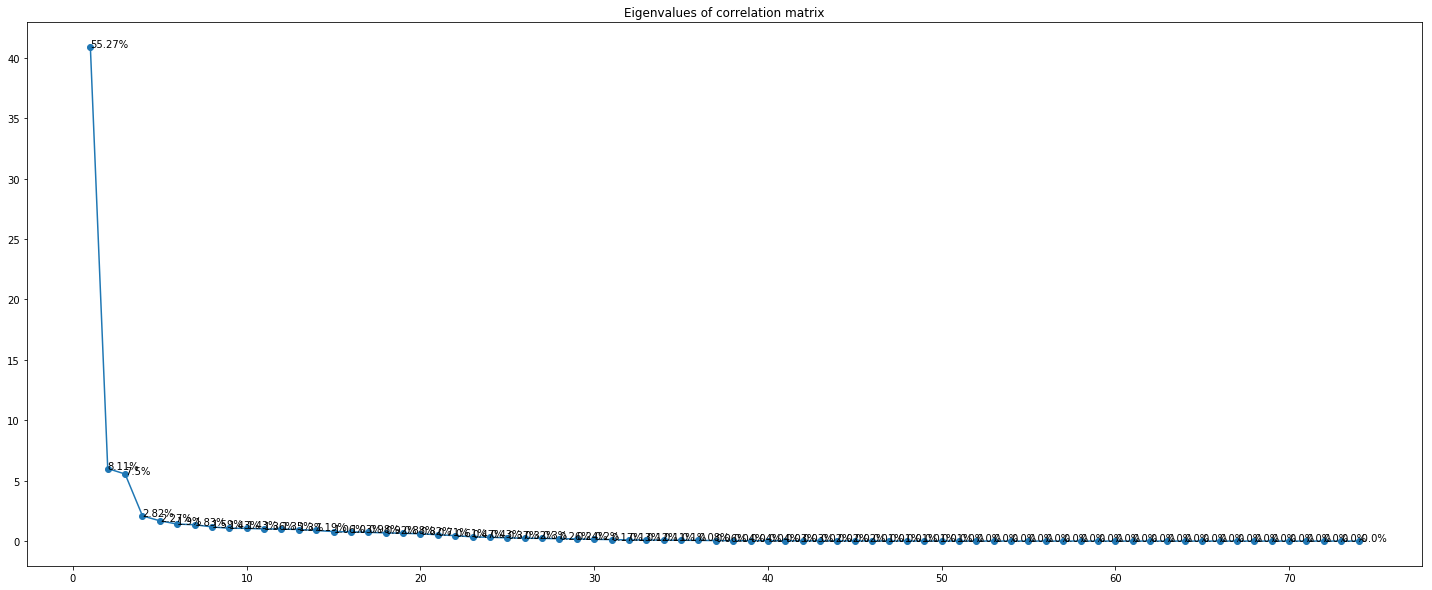

In [48]:
plt.figure(figsize=(25,10))
plt.plot(dft['x'], dft['y'], marker='o')
ax = plt.gca()
dft.apply(lambda x: ax.annotate(x['Tot_var'], (x['x'], x['y'])), axis=1);
plt.title('Eigenvalues of correlation matrix')
plt.show()

Следует найти такое место на графике, где убывание собственных значений слева направо максимально замедляется. Предполагается, что справа от этой точки находится только "факториальная осыпь".

Таким образом, число выделенных факторов не должно превышать количество факторов слева от этой точки.  

### Вклады главных компонент в суммарную дисперсию исходных признаков

In [49]:
cumlt_dispersion =[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                   0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
cur=0
for i in range(len(features)):
    cur=cur+dispersion[i]
    cumlt_dispersion[i]=cur



In [50]:
cumlt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
cur=0
for i in range(len(features)):
    cur=cur+eigenvalues_sorted[i]
    cumlt[i]=cur


In [51]:
d=np.array([eigenvalues_sorted,dispersion,cumlt,cumlt_dispersion]).T
s=pd.DataFrame(
    data=d,
    columns=['eig','variance','cumlt_eig','cumlt_variance'])
s.head(25)

,eig,variance,cumlt_eig,cumlt_variance
0,40.896446,0.552655,40.896446,0.552655
1,6.002204,0.081111,46.898650,0.633766
2,5.550823,0.075011,52.449474,0.708777
3,2.085256,0.028179,54.534730,0.736956
4,1.679180,0.022692,56.213910,0.759647
5,1.409369,0.019046,57.623278,0.778693
6,1.353353,0.018289,58.976631,0.796982
7,1.174500,0.015872,60.151132,0.812853
8,1.061248,0.014341,61.212380,0.827194
9,1.056602,0.014278,62.268982,0.841473


где <b>eig</b> -  оценки собственных значений <br>
<b>variance</b> - относительный вклад каждой главной компоненты в суммарную дисперсию <br>
<b>cumlt_eig</b> - накопленные значения собственных чисел <br>
<b>cumlt_variance</b> - накопленный относительный вклад

## 4.Непосредственное построение главных компонент 

Известно, что собственные векторы, соответствующие разным собственным числам, ортогональны. 
Таким образом будут выполнены требования некоррелированности главных компонент.

Следовательно, дисперсия второй главной компоненты будет равна  , а вектор   будет найден как собственный вектор матрицы  , соответствующий собственному числу.

Таким образом, можно построить k главных компонент.


In [52]:
u=np.empty((f_len,f_len))
for i in range(f_len):
    u[i]=couple_lst[i][1] #достаем главные компоненты(собственные векторы корреляционной матрицы) из матрицы couple_list
    
u=pd.DataFrame(
    data=u.T,
    columns=['Factor_' + str(i + 1) for i in range(f_len)],
    index=features)
u # eigenvectors of correlation matrix

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,...,Factor_65,Factor_66,Factor_67,Factor_68,Factor_69,Factor_70,Factor_71,Factor_72,Factor_73,Factor_74
Население,0.008063,-0.010204,-0.020466,0.088386,-0.052482,0.049103,-0.374066,0.456986,0.282135,0.173782,...,-0.000313,0.000285,0.000159,0.000058,-0.000176,-0.000113,0.000038,6.865968e-06,2.679694e-07,-1.235084e-12
ОК(кроме 6001) Возм. не представлено (объем),0.145419,0.021612,-0.136893,-0.003525,0.035762,-0.008873,0.008146,0.014831,-0.003991,-0.013891,...,0.001329,0.005431,-0.026964,0.002576,0.009760,-0.004498,-0.001375,-2.505513e-03,8.963085e-05,3.852028e-10
ОК(кроме 6001) Возм. не представлено (кол-во),0.153873,-0.002855,-0.003099,-0.013781,-0.042927,0.052962,-0.015288,0.000340,-0.029205,-0.003956,...,0.037518,-0.038333,0.082020,0.010916,-0.021878,-0.021946,0.009747,1.284174e-03,3.980147e-04,-1.857712e-10
Расходные операции 6001(кол-во),0.148142,-0.020428,0.084804,0.001684,-0.058590,0.034487,-0.039491,-0.009214,-0.041363,0.016796,...,0.094065,0.127032,0.000225,0.297585,0.123894,0.045015,-0.002856,-1.171267e-03,3.690293e-04,5.330261e-10
Приходные операции 6001(кол-во),0.150851,-0.028899,0.087278,0.000686,-0.021075,0.011791,-0.020320,-0.003941,-0.024758,-0.002577,...,0.110843,0.082800,-0.055187,0.401055,0.167492,-0.000825,-0.002614,2.861089e-03,2.894739e-03,9.031167e-10
Расходные операции 6001,0.136581,-0.003759,0.030219,0.066338,0.032874,0.073710,-0.036234,-0.042944,-0.031204,0.064629,...,0.091747,-0.005473,0.024171,-0.018190,0.003538,0.019576,-0.012176,2.132762e-03,-1.023900e-03,-5.205747e-10
Доли выв. ДС в заруб. банки,0.002773,0.089862,0.002373,0.627660,-0.025212,0.058518,0.122216,-0.115383,-0.001266,0.070529,...,0.000253,0.000637,-0.000193,0.000193,0.000199,0.000175,0.000228,1.338844e-05,-4.440287e-06,-4.334432e-12
Кол-во риск-ориентировок запросы,0.001166,0.159411,0.047832,-0.072146,0.011936,0.015894,0.085970,0.100752,0.291819,0.352859,...,0.000053,-0.000399,0.000487,0.000424,-0.000008,-0.000206,0.000078,-5.999756e-06,-7.339228e-06,-2.581656e-12
Кол-во проверок,0.075740,0.120052,0.037507,-0.095676,-0.059135,0.064627,0.171724,-0.080852,0.151942,-0.069695,...,-0.000398,0.000595,0.000178,0.000319,-0.000213,-0.000050,0.000035,-5.173985e-05,-3.511067e-05,-5.814616e-12
КВО 4005 Всего (объем),0.153313,-0.008098,0.014930,0.002038,-0.036208,0.042822,-0.014025,-0.000939,-0.028867,0.005573,...,-0.001906,-0.003231,0.002373,0.012458,0.000412,-0.004320,0.002007,6.668202e-04,2.464799e-05,-1.061895e-10


In [53]:
u=u.iloc[:, :pc]
u

,Factor_1,Factor_2,Factor_3,Factor_4
Население,0.008063,-0.010204,-0.020466,0.088386
ОК(кроме 6001) Возм. не представлено (объем),0.145419,0.021612,-0.136893,-0.003525
ОК(кроме 6001) Возм. не представлено (кол-во),0.153873,-0.002855,-0.003099,-0.013781
Расходные операции 6001(кол-во),0.148142,-0.020428,0.084804,0.001684
Приходные операции 6001(кол-во),0.150851,-0.028899,0.087278,0.000686
Расходные операции 6001,0.136581,-0.003759,0.030219,0.066338
Доли выв. ДС в заруб. банки,0.002773,0.089862,0.002373,0.627660
Кол-во риск-ориентировок запросы,0.001166,0.159411,0.047832,-0.072146
Кол-во проверок,0.075740,0.120052,0.037507,-0.095676
КВО 4005 Всего (объем),0.153313,-0.008098,0.014930,0.002038


### Матрица нагрузок

Матрица нагрузок главных компонент на исходные признаки является важной характеристикой, позволяющей дать интерпретацию главным компонентам.
 
Если исходные признаки центировано-нормированные, то элементы матрицы нагрузок  :
1.	 определяют степень тесноты парной линейной связи между   и   (парный коэффициент корреляции);
2.	 удельный вес влияния  -ой главной компоненты на признак  

Она определяется следующим образом: 
$$A = U^T\lambda^\frac{1}{2}$$

In [62]:
AAA = pd.DataFrame(
    data=A,
    columns=['Factor_' + str(i + 1) for i in range(pc)],
    index=features)

In [54]:
sqrt_l=np.eye(pc)
for i in range(pc):
    sqrt_l[i][i]=math.sqrt(eigenvalues_sorted[i])
A=np.dot(u,sqrt_l)
pd.DataFrame(
    data=A,
    columns=['Factor_' + str(i + 1) for i in range(pc)],
    index=features)

,Factor_1,Factor_2,Factor_3,Factor_4
Население,0.051563,-0.025000,-0.048219,0.127633
ОК(кроме 6001) Возм. не представлено (объем),0.929961,0.052948,-0.322522,-0.005091
ОК(кроме 6001) Возм. не представлено (кол-во),0.984025,-0.006994,-0.007302,-0.019901
Расходные операции 6001(кол-во),0.947371,-0.050046,0.199800,0.002432
Приходные операции 6001(кол-во),0.964695,-0.070802,0.205628,0.000991
Расходные операции 6001,0.873441,-0.009208,0.071197,0.095795
Доли выв. ДС в заруб. банки,0.017735,0.220156,0.005591,0.906367
Кол-во риск-ориентировок запросы,0.007454,0.390548,0.112693,-0.104182
Кол-во проверок,0.484357,0.294119,0.088367,-0.138160
КВО 4005 Всего (объем),0.980439,-0.019839,0.035176,0.002943


### Матрица индивидуальных значений главных компонент

$$ X^T = AF^T $$

Если m=k $$ F^T = A^{-1}X^T $$
В общем случае m<=k 

$$ A^TX^T = (A^TA)F^T $$

$$ F^T = (A^TA)^{-1}A^TX^T $$

In [55]:
F=np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),scaled_data.T)
result=pd.DataFrame(
    F.T,
    index=scaled_data.index, 
    columns=['z' + str(i + 1) for i in range(pc)]
)
result=result.sort_values('z1', ascending=False)
result

,z1,z2,z3,z4
КО391,35.139512,-4.465308,6.716228,0.467771
КО264,7.227669,6.901482,-29.074530,-0.656315
КО354,5.559596,0.475606,3.146763,-1.523017
КО417,5.391505,0.043380,3.803725,-0.768168
КО1233,4.715122,-0.786971,4.073284,0.172328
КО73,4.640198,4.456528,-17.543092,-0.641268
КО640,4.285544,0.440338,0.969457,1.005360
КО1198,3.024606,0.652043,1.335713,-0.842893
КО1288,2.499648,1.188820,0.126789,-1.237525
КО93,2.049521,0.395747,1.629925,-0.067688


In [71]:
path = "result.xlsx"
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
sheet_name = 'Индив.значения ГК'
sheet_name1 = 'Матрица нагрузок'
sheet_name2 = 'Матрица U'
sheet_name3 = 'Собств.числа'
sheet_name4 = 'Сумм.вариация'
sheet_name5 = 'Корреляция'
#запись членов кластеров в файл result на лист с именем result
#файл создается в той же директории, где лежит ноутбук с кодом
result.to_excel(writer, sheet_name=sheet_name)
AAA.to_excel(writer, sheet_name=sheet_name1)
u.to_excel(writer, sheet_name=sheet_name2)
s.to_excel(writer, sheet_name=sheet_name3)
dft.to_excel(writer, sheet_name=sheet_name4)
correlation.to_excel(writer, sheet_name=sheet_name5)